In [ ]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [ ]:
#read the file
df = pd.read_csv('Apple_Nasd.csv')

#print the head
df.head()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25


Text(0, 0.5, 'Close Price USD ($)')

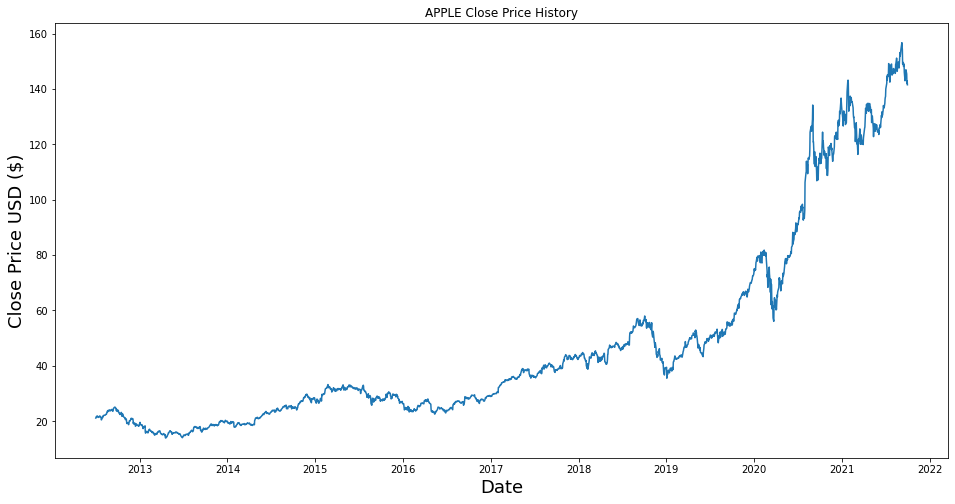

In [ ]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Appl_Close'], label='Close Price history')
plt.title('APPLE Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

Text(0, 0.5, 'Close Price USD ($)')

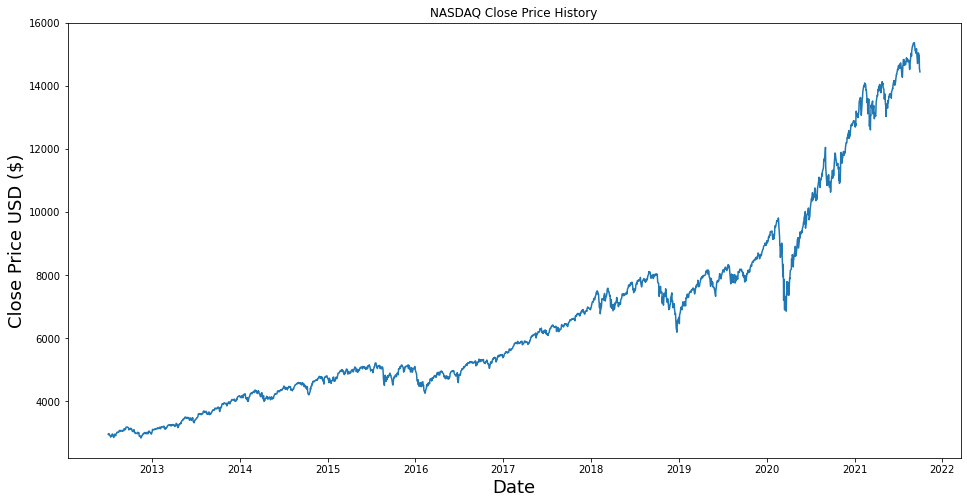

In [ ]:
#plot for NASDAQ
plt.figure(figsize=(16,8))
plt.plot(df['Nasd_Close'], label='Close Price history')
plt.title('NASDAQ Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

**Moving Average**

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Appl_Close', 'Nasd_Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Appl_Close'][i] = data['Appl_Close'][i]

In [ ]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 3)


In [ ]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Appl_Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Appl_Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
585.1582588237056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Close Price USD ($)')

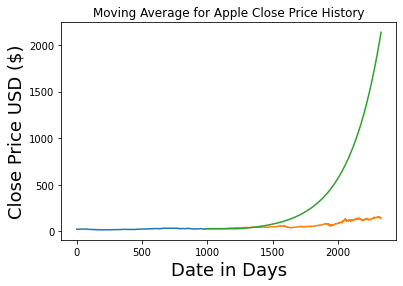

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Appl_Close'])
plt.plot(valid[['Appl_Close', 'Predictions']])
plt.title('Moving Average for Apple Close Price History')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)


In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Appl_Close', 'Nasd_Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Nasd_Close'][i] = data['Nasd_Close'][i]

In [ ]:
# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)


 Shape of training set:
(987, 3)


In [ ]:
# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Nasd_Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Nasd_Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
111787.322839017


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Close Price USD ($)')

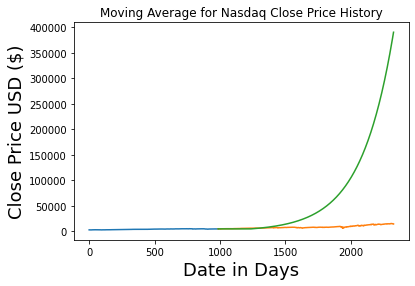

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Nasd_Close'])
plt.plot(valid[['Nasd_Close', 'Predictions']])
plt.title('Moving Average for Nasdaq Close Price History')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

**Inference**

the RMS value is close to 585 and the result is not promising. The predicted values are same range as the observed values in the train set but not following the trend of the actual closing price.

**Linear Regression**

The linear regression is the most used machine learning algorithm that can be implemented on this data. The linear regression model determines the relationship between the independent variables and the dependent variable.

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Appl_Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Appl_Close'][i] = data['Appl_Close'][i]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             Appl_Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 4.704e+04
Date:                Sat, 11 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:58:46   Log-Likelihood:                -8038.9
No. Observations:                2328   AIC:                         1.608e+04
Df Residuals:                    2326   BIC:                         1.609e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -27.4911      0.381    -72.163      0.0

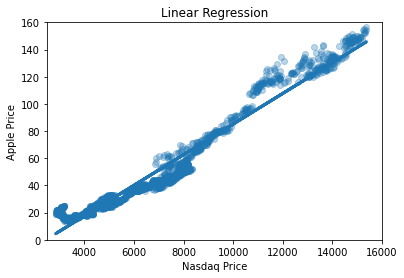

In [ ]:
AAPL_price = pd.read_csv('Apple_Nasd.csv',usecols=['Date', 'Appl_Close'])
NASD_price = pd.read_csv('Apple_Nasd.csv',usecols=['Date', 'Nasd_Close'])

X = sm.add_constant(NASD_price['Nasd_Close'])
model = sm.OLS(AAPL_price['Appl_Close'],X)
results = model.fit()

plt.scatter(NASD_price['Nasd_Close'],AAPL_price['Appl_Close'],alpha=0.3)
y_predict = results.params[0] + results.params[1]*NASD_price['Nasd_Close']
plt.plot(NASD_price['Nasd_Close'],y_predict, linewidth=3)

plt.xlim(2500,16000)
plt.ylim(0,160)
plt.xlabel('Nasdaq Price')
plt.ylabel('Apple Price')
plt.title('Linear Regression')
print(results.summary())

**Multivariate Analysis**

In [ ]:
!pip install --quiet pytorch-lightning==1.2.5


In [ ]:
!pip install --quiet tqdm==4.59.0

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import pytorch_lightning as pl
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"] 

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize']=12,8

tqdm.pandas()

In [ ]:
pl.seed_everything(42)

Global seed set to 42


42

In [ ]:
df=pd.read_csv('Apple_Nasd.csv')
df

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2021-09-24,145.660004,147.470001,145.559998,146.92,146.71,53477900,0.09,0.06,1.24,14961.61,15067.56,14946.57,15047.70,15047.70,3972140000,-4.54,0.03,1.69,4.8,3.25
2324,2021-09-27,145.470001,145.960007,143.820007,145.37,145.16,74150700,-1.55,1.07,1.24,14954.18,15003.16,14864.96,14969.97,14969.97,4619450000,-77.73,0.52,1.69,4.8,3.25
2325,2021-09-28,143.250000,144.750000,141.690002,141.91,141.70,108972300,-3.46,2.44,1.24,14787.21,14817.74,14539.88,14546.68,14546.68,4954270000,-423.29,2.91,1.69,4.8,3.25
2326,2021-09-29,142.470001,144.449997,142.029999,142.83,142.62,74602000,0.92,0.64,1.24,14614.88,14676.62,14493.67,14512.44,14512.44,5246170000,-34.24,0.24,1.69,4.8,3.25


In [ ]:
df.shape

(2328, 21)

In [ ]:
df["Prev_Apl_Close"] = df.shift(1)['Appl_Close']
df["Prev_Nas_Close"] = df.shift(1)['Nasd_Close']

In [ ]:
df.head()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,21.16,2951.23
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,21.41,2976.08
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,21.78,2976.12
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,21.64,2937.33


In [ ]:
df["Apl_Change"]= df.progress_apply(
    lambda row: 0 if np.isnan(row.Prev_Apl_Close) else row.Appl_Close-row.Prev_Apl_Close,
    axis=1
)

  0%|          | 0/2328 [00:00<?, ?it/s]

In [ ]:
df.head()

,Date,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
0,2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN,0.00
1,2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,21.16,2951.23,0.25
2,2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,21.41,2976.08,0.37
3,2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,21.78,2976.12,-0.14
4,2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,21.64,2937.33,0.28


In [ ]:
df1=df.drop(['Date'], axis=1)



In [ ]:
df1.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
Date,,,,,,,,,,,,,,,,,,,,,,,
2012-07-02,20.883215,21.195356,20.842857,21.16,18.14,400092000,0.30,1.42,1.24,2938.41,2951.23,2925.71,2951.23,2951.23,1845240000,16.18,0.55,0.52,8.2,3.25,NaN,NaN,0.00
2012-07-03,21.245714,21.428572,21.214287,21.41,18.35,241712800,0.25,1.17,1.24,2950.81,2976.08,2948.40,2976.08,2976.08,1009330000,24.85,0.83,0.52,8.2,3.25,21.16,2951.23,0.25
2012-07-05,21.448570,21.940714,21.416071,21.78,18.68,484383200,0.37,1.70,1.24,2970.37,2987.94,2958.30,2976.12,2976.12,1423990000,0.04,0.00,0.52,8.2,3.25,21.41,2976.08,0.37
2012-07-06,21.681786,21.730000,21.485001,21.64,18.55,418930400,-0.14,0.65,1.24,2955.20,2957.50,2921.37,2937.33,2937.33,1437420000,-38.79,1.32,0.52,8.2,3.25,21.78,2976.12,-0.14
2012-07-09,21.617857,21.924999,21.575357,21.92,18.80,379405600,0.28,1.28,1.24,2934.49,2942.99,2919.04,2931.77,2931.77,1455500000,-5.56,0.19,0.52,8.2,3.25,21.64,2937.33,0.28


In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(df1)
sc_df=df1
sc_df=pd.DataFrame(
    scaler.transform(sc_df),
    index=sc_df.index,
    columns=sc_df.columns
    )

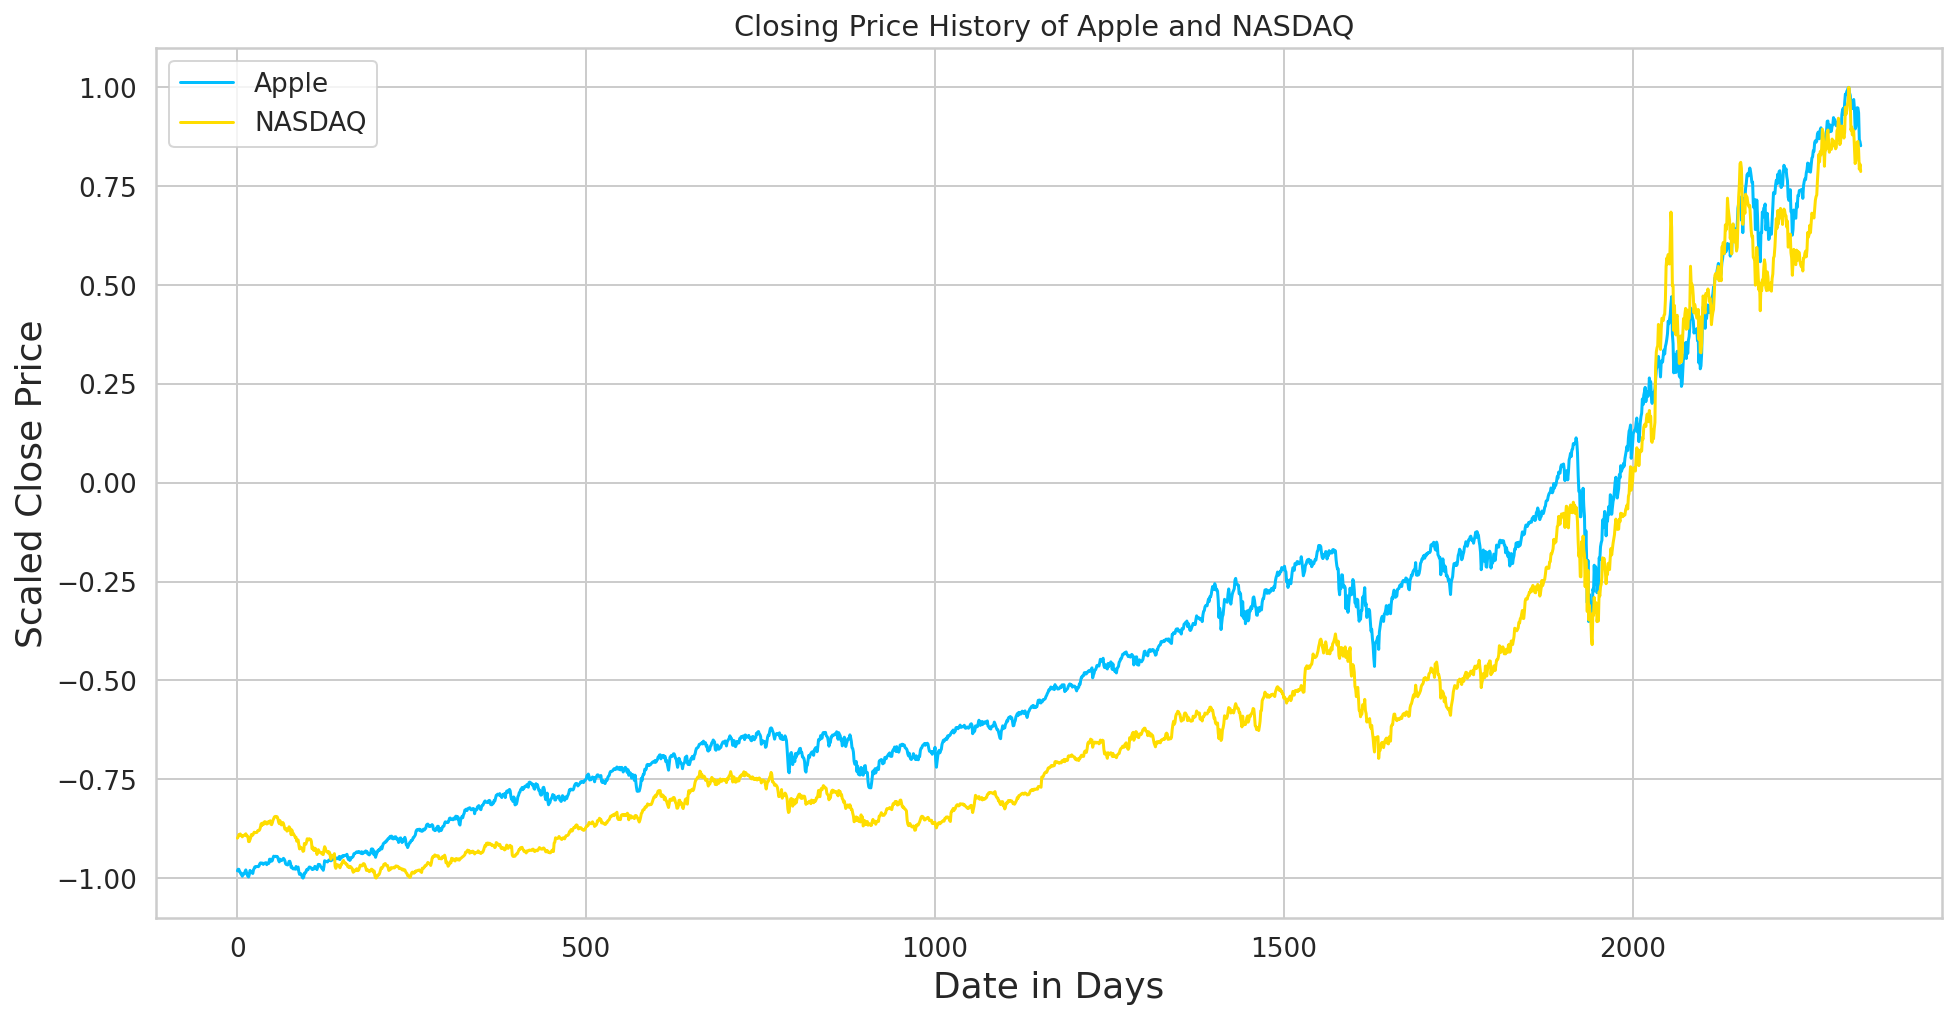

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('Closing Price History of Apple and NASDAQ ')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Scaled Close Price', fontsize=18)
plt.plot(sc_df["Nasd_Close"])
plt.plot(sc_df["Appl_Close"])
plt.legend(['Apple', 'NASDAQ'])


In [ ]:
row=[]

for _, row in tqdm(df.iterrows(), total=df.shape[0]):
  row_data = dict(
      Appl_Close= row.Appl_Close,
      Nasd_Close=row.Nasd_Close,
     
  )
  
features_df=pd.DataFrame(row)

  0%|          | 0/2328 [00:00<?, ?it/s]

In [ ]:
train_size=int(len(df1)*.8)
train_size

1862

In [ ]:
train_df, test_df = df1[:train_size], df1[train_size +1:]
train_df.shape, test_df.shape

((1862, 23), (465, 23))

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train_df)


In [ ]:
train_df=pd.DataFrame(
    scaler.transform(train_df),
    index=train_df.index,
    columns=train_df.columns
)

In [ ]:
test_df=pd.DataFrame(
    scaler.transform(test_df),
    index=test_df.index,
    columns=test_df.columns
)

In [ ]:
train_df.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
0,-0.735418,-0.737375,-0.730414,-0.727049,-0.776039,-0.498880,0.255193,-0.798724,-0.913265,-0.965322,-0.966659,-0.959863,-0.960134,-0.960134,-0.226480,0.000087,-0.800363,-0.342657,1.0,-1.0,NaN,NaN,0.166172
1,-0.721770,-0.728529,-0.716290,-0.717585,-0.768213,-0.722673,0.240356,-0.834160,-0.913265,-0.961001,-0.957992,-0.951938,-0.951466,-0.951466,-0.607764,0.025196,-0.698730,-0.342657,1.0,-1.0,-0.727049,-0.960134,0.240356
2,-0.714132,-0.709103,-0.708617,-0.703578,-0.755916,-0.379774,0.275964,-0.759036,-0.913265,-0.954185,-0.953855,-0.948480,-0.951452,-0.951452,-0.418625,-0.046656,-1.000000,-0.342657,1.0,-1.0,-0.717585,-0.951466,0.275964
3,-0.705351,-0.717096,-0.705995,-0.708878,-0.760760,-0.472261,0.124629,-0.907867,-0.913265,-0.959471,-0.964472,-0.961379,-0.964983,-0.964983,-0.412499,-0.159113,-0.520871,-0.342657,1.0,-1.0,-0.703578,-0.951452,0.124629
4,-0.707758,-0.709699,-0.702559,-0.698277,-0.751444,-0.528110,0.249258,-0.818568,-0.913265,-0.966688,-0.969533,-0.962193,-0.966922,-0.966922,-0.404253,-0.062875,-0.931034,-0.342657,1.0,-1.0,-0.708878,-0.964983,0.249258


In [ ]:
test_df.head()

,Appl_Open,Appl_High,Appl_Low,Appl_Close,Appl_Adj_Close,Appl_Volume,Appl_Diff,Appl_Diff_Percent,Appl_EPS,Nasd_Open,Nasd_High,Nasd_Low,Nasd_Close,Nasd_Adj_Close,Nasd_Volume,Nasd_Diff,Nasd_Diff_Percent,Nasd_EPS,Unempl_rate,Bank_int_rate,Prev_Apl_Close,Prev_Nas_Close,Apl_Change
1863,0.990964,0.992035,0.972525,0.973121,0.974287,-0.915558,0.011869,-0.888023,1.0,1.019996,1.024405,1.031048,1.026953,1.026953,0.042331,-0.002056,-0.934664,0.622378,-0.957447,0.333333,0.992807,1.021567,0.011869
1864,0.978162,0.999810,0.999239,1.006814,1.006708,-0.972040,0.430267,-0.811481,1.0,1.031911,1.040512,1.043958,1.046922,1.046922,-0.272394,0.119030,-0.760436,0.622378,-0.957447,0.333333,0.973121,1.026953,0.430267
1865,0.987763,1.000000,1.004848,1.001136,1.001118,-0.998347,0.121662,-0.968816,1.0,1.036239,1.037516,1.044468,1.033071,1.033071,-0.566822,-0.161777,-0.833031,0.622378,-0.957447,0.333333,1.006814,1.046922,0.121662
1866,0.994070,1.002371,0.981557,0.971986,0.972797,-0.930706,-0.062315,-0.834160,1.0,1.033043,1.028977,1.001198,0.999069,0.999069,-0.052831,-0.329086,-0.586207,0.622378,-0.957447,0.333333,1.001136,1.033071,-0.062315
1867,0.909731,0.919683,0.913488,0.927314,0.929570,-0.902526,-0.183976,-0.742027,1.0,0.959123,0.977057,0.964607,0.982552,0.982552,-0.015128,-0.183903,-0.796733,0.622378,-0.957447,0.333333,0.971986,0.999069,-0.183976


In [ ]:
def create_sequences(input_data: pd.DataFrame, target_column, Sequence_length):

  sequence=[]
  data_size = len(input_data)

  for i in tqdm(range(data_size - sequence_length)):

    sequence = input_data[i:i+sequence_length]

    label_position = i + sequence_length
    label = input_data.iloc[label_position][target_column]

    sequences.append((sequence, label))

  return sequences

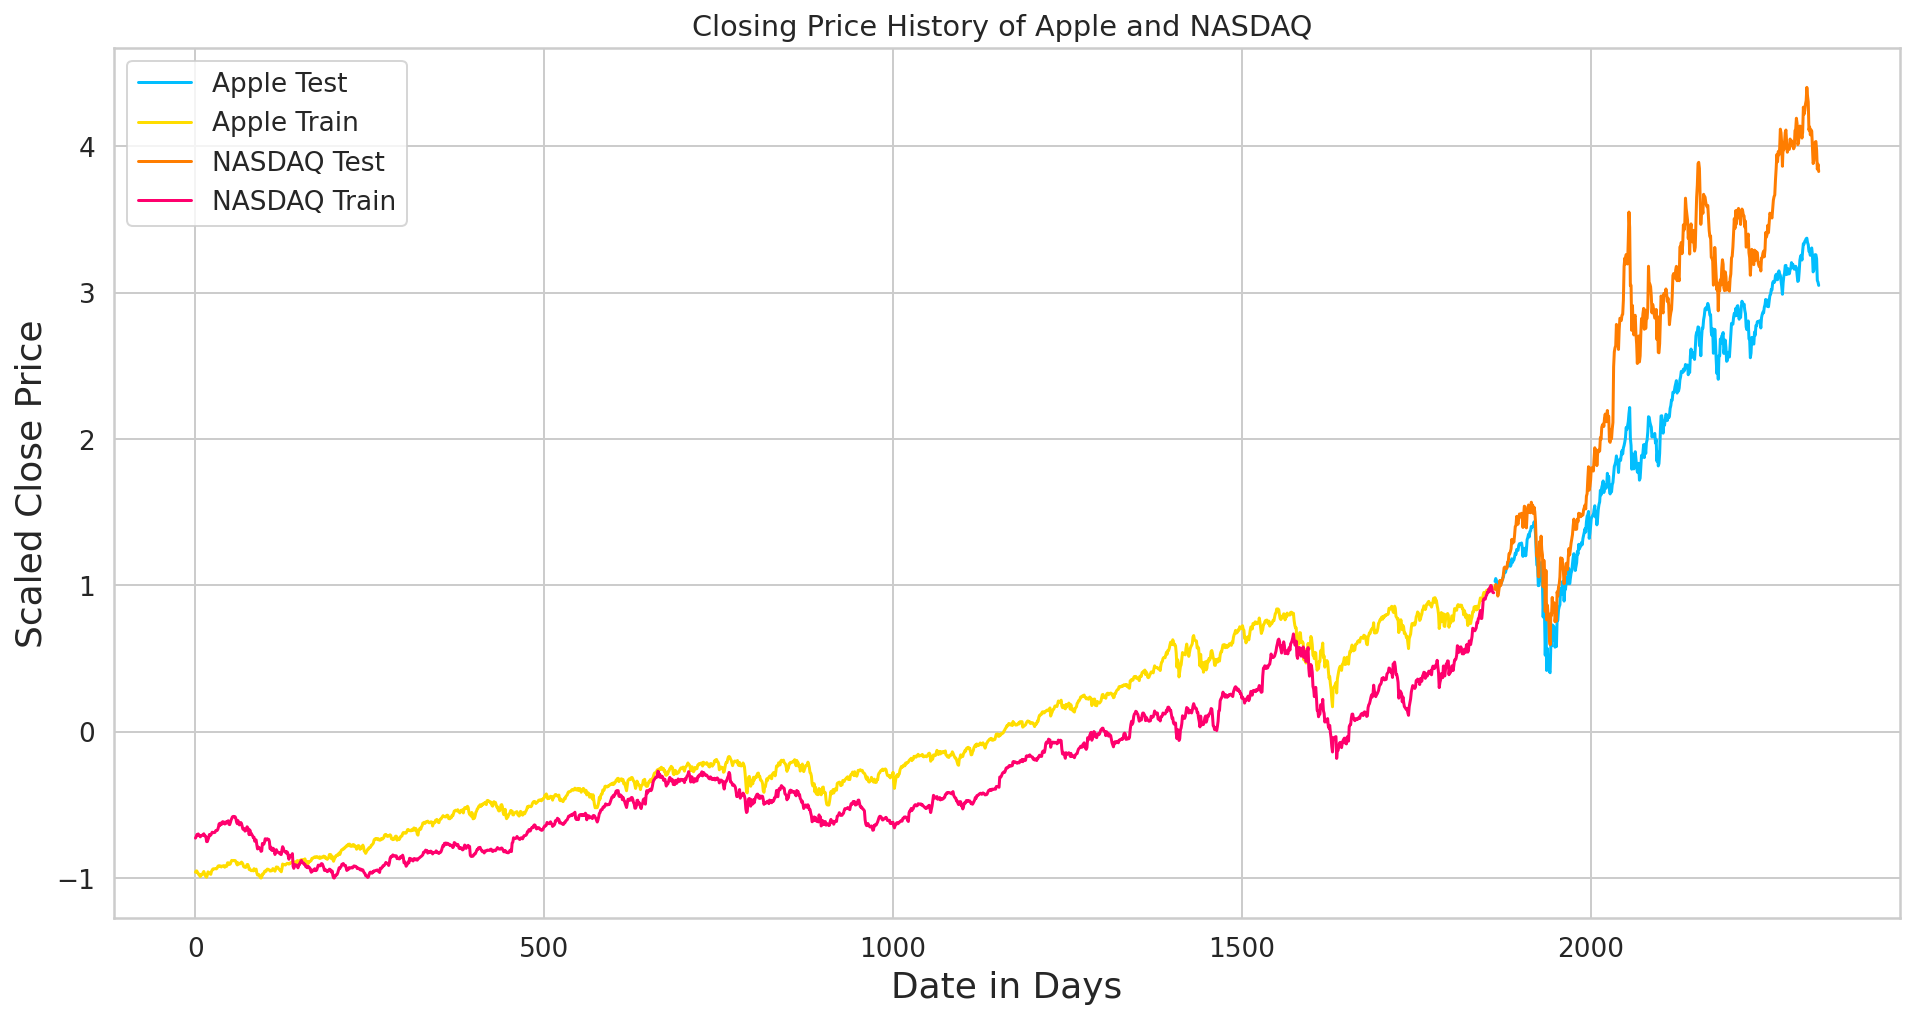

In [ ]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.title('Closing Price History of Apple and NASDAQ ')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Scaled Close Price', fontsize=18)
plt.plot(test_df["Nasd_Close"],label='Test Close Price')
plt.plot(train_df["Nasd_Close"],label='Train Close Price')
plt.plot(test_df["Appl_Close"],label='Test Close Price')
plt.plot(train_df["Appl_Close"],label='Train Close Price')
plt.legend([ 'Apple Test','Apple Train','NASDAQ Test', 'NASDAQ Train'])

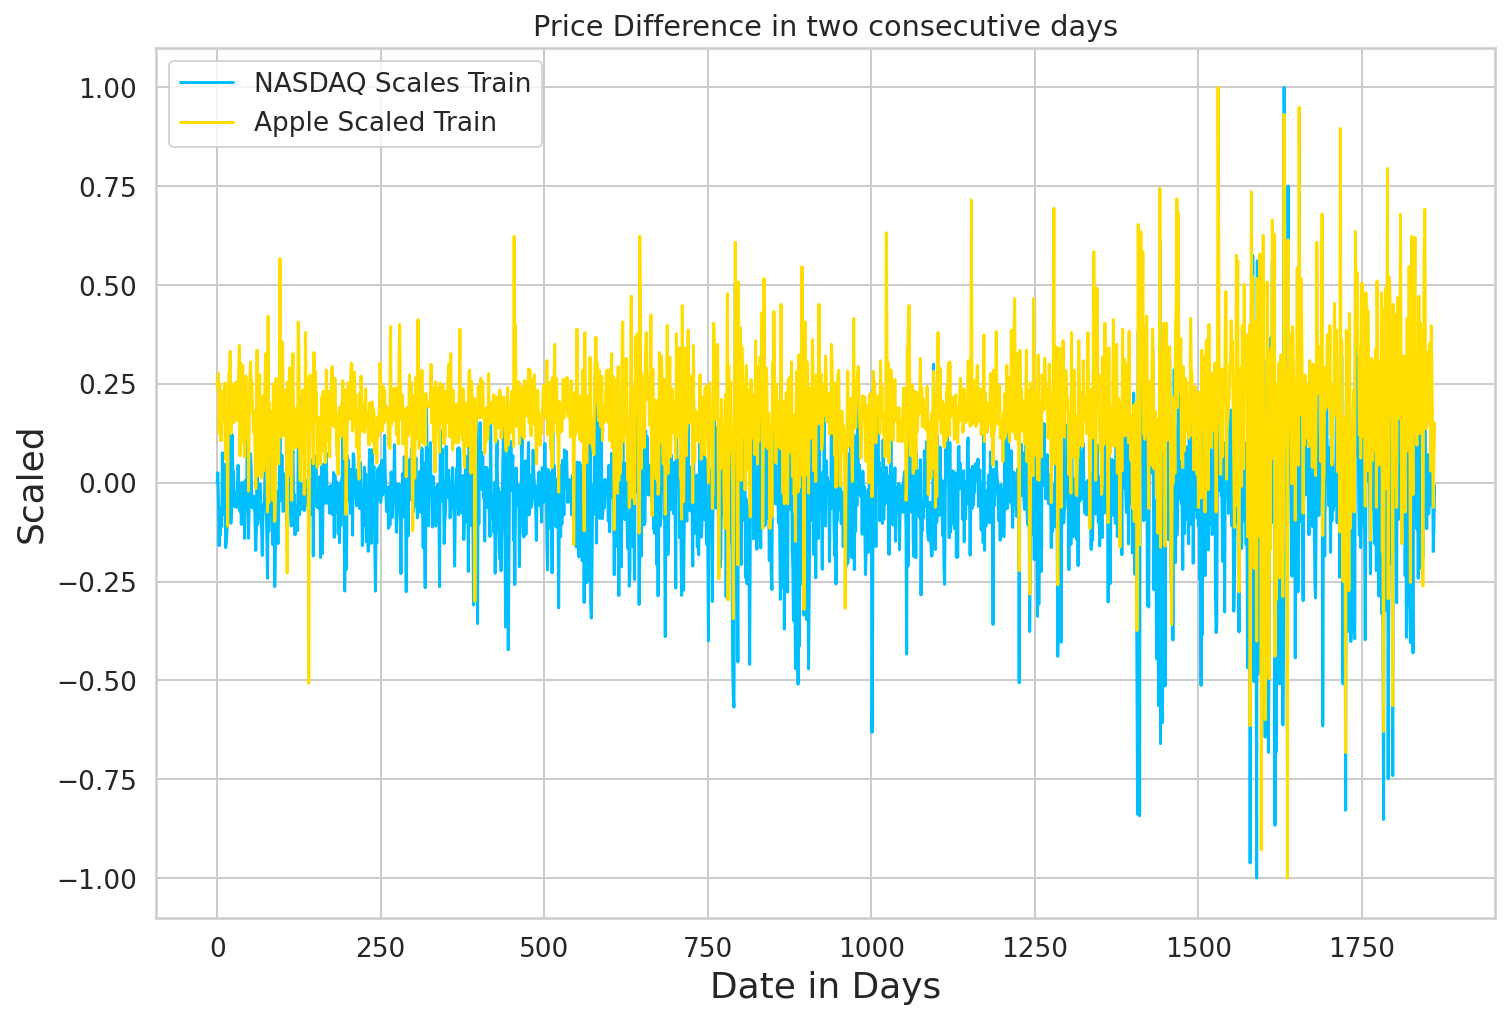

In [ ]:
plt.plot(train_df["Nasd_Diff"],label='Close Price')
plt.plot(train_df["Appl_Diff"],label='Close Price')
plt.title('Price Difference in two consecutive days')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Scaled', fontsize=18)
plt.legend([ 'NASDAQ Scales Train', 'Apple Scaled Train'])

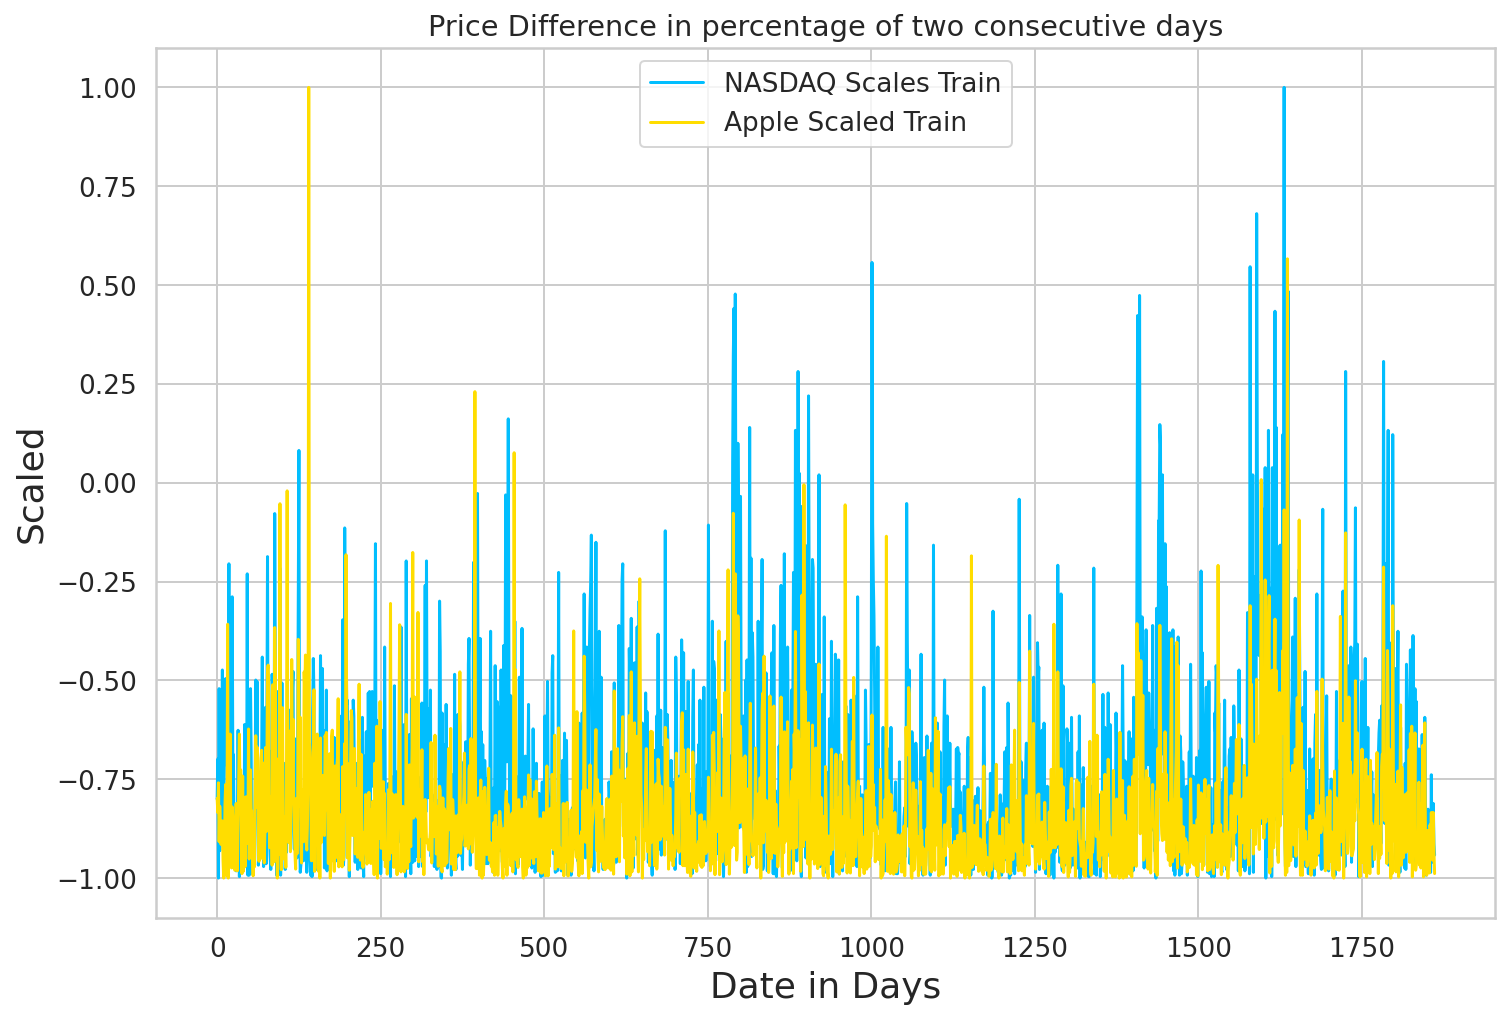

In [ ]:
plt.plot(train_df["Nasd_Diff_Percent"],label='Price Percent')
plt.plot(train_df["Appl_Diff_Percent"],label='Price_Percent')
plt.title('Price Difference in percentage of two consecutive days')
plt.xlabel('Date in Days', fontsize=18)
plt.ylabel('Scaled', fontsize=18)
plt.legend([ 'NASDAQ Scales Train', 'Apple Scaled Train'])